# アインシュタイン比熱とデバイ比熱  

（初版：2020年3月10日、更新：2021年2月5日）  

格子振動による比熱に関して、アインシュタイン模型とデバイ模型があります。  
それぞれのモデルにより比熱の温度依存性は以下のように求められます。

アインシュタイン比熱  

　　$C_V(T) = 3N_A k_B \bigl( \frac{\Theta_E}{T} \bigr)^2 \frac{e^{\Theta_E / T}}{(e^{\Theta_E / T} - 1)^2}$  

デバイ比熱  

　　$C_V(T) = 9N_A k_B \bigl( \frac{T}{\Theta_D} \bigr)^3 \int_{0}^{\Theta_D / T}\frac{x^4 e^x}{(e^x - 1)^2}dx$  

この計算をJuliaですると、以下のようになります。

  0.440250 seconds (1.05 M allocations: 52.864 MiB, 4.52% gc time)


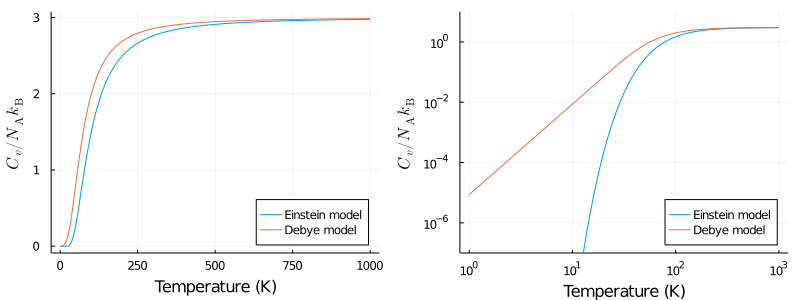

In [1]:
#//------------------------------------------------------------------------//
#//---    アインシュタイン比熱とデバイ比熱のシミュレーション 
#//------------------------------------------------------------------------//
using Plots
using Plots.PlotMeasures
using QuadGK
using LaTeXStrings

#//---------- グリューナイゼンの式の計算をする関数 ----------//
function SpecificHeatCalc()

    ET = 300; #アインシュタイン温度（K）
    DT = 300; #デバイ温度（K）
    kB = 1; #ボルツマン定数。１としておきます。
    N0 = 1; #アボガドロ数。１としておきます

    #温度の設定
    temp = collect(1:0.1:1000);
    #アインシュタイン比熱
    EinC = 3*N0*kB*((ET./temp).^2).*exp.(ET./temp)./(exp.(ET./temp).-1).^2;
    #デバイ比熱
    f(x) = x^4*exp(x)/(exp(x)-1)^2; #積分する式の定義
    intpart1 = quadgk.(f, 0, DT./temp); #積分部分の実行
    intpart2 = [intpart1[i][1] for i in 1:length(intpart1)] #TupleをArrayに変換とか
    DebC = 9*N0*kB*((temp./DT).^3).*intpart2;
    return temp, EinC, DebC
end

#//---------- 計算の実行 ----------//
@time temp, EinC, DebC = SpecificHeatCalc()

#//---------- 図の描画 ----------//
p1 = plot(temp, [EinC, DebC], xscale = :identity, yscale = :identity, seriestype=:line,
                label=["Einstein model" "Debye model"], legend=:bottomright, ylabel=L"C_v/N_\mathrm{A}k_\mathrm{B}", xlabel="Temperature (K)")
p2 = plot(temp, [EinC, DebC], xscale = :log10, yscale = :log10, seriestype=:line, ylims=(10^(-7),10),
                label=["Einstein model" "Debye model"], legend=:bottomright, ylabel=L"C_v/N_\mathrm{A}k_\mathrm{B}", xlabel="Temperature (K)")
plot(p1,p2,layout=(1,2),size=(800,300), bottom_margin = 15px, left_margin = [15px 15px 15px])

比熱の測定データについて解析する際に、温度の三乗で割った図を作成することがあります。これは、デバイ項とアインシュタイン項について視認性をよくするためです。  
低温で $T^3$ に比例するデバイ項は一定値に、指数関数的に減少するアインシュタイン項はピーク構造を示します。  

実際に $C/T^3$ vs $T$ をプロットすると以下のようになります。

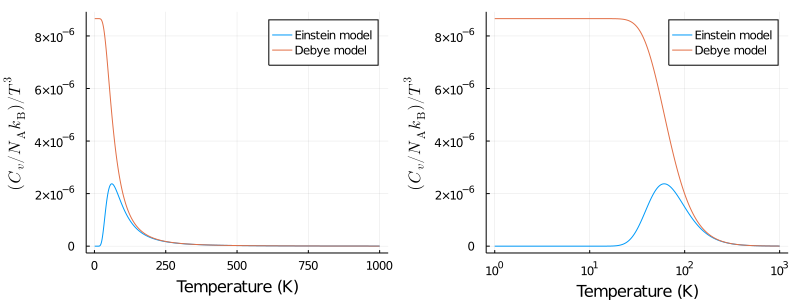

In [2]:
p3 = plot(temp, [EinC./temp.^3, DebC./temp.^3], xscale = :identity, yscale = :identity, seriestype=:line,
                label=["Einstein model" "Debye model"], legend=:topright, ylabel=L"(C_v/N_\mathrm{A}k_\mathrm{B})/T^3", xlabel="Temperature (K)")
p4 = plot(temp, [EinC./temp.^3, DebC./temp.^3], xscale = :log10, yscale = :identity, seriestype=:line,
                label=["Einstein model" "Debye model"], legend=:topright, ylabel=L"(C_v/N_\mathrm{A}k_\mathrm{B})/T^3", xlabel="Temperature (K)")
plot(p3,p4,layout=(1,2),size=(800,300), bottom_margin = 15px, left_margin = [15px 15px 15px])

In [3]:
#//---------- データの保存 ----------//
using CSV, DataFrames
function saveData2(xwave, y1wave, y2wave, filename::String)
    df = DataFrame(temp = xwave, CforEin = y1wave, CforDev = y2wave);
    df |> CSV.write(filename)
end

saveData2(temp, EinC, DebC, "CvsT.csv")

"CvsT.csv"